# 불균형 데이터 모델 평가

### 혼동행렬

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

##### 불균형 데이터 생성

In [ ]:
# 데이터 준비
from sklearn.datasets import load_digits
# load_digits 손글씨 숫자

digits_dataset = load_digits()
np.unique(digits_dataset['target'], return_counts=True)
# array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
# array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]
# 0~9까지 보면 거의 균형 데이터 셋임

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180]))

In [ ]:
# 불균형 데이터셋 만들기
from sklearn.model_selection import train_test_split
X = digits_dataset['data']
y = digits_dataset['target']
# 이건 균형 데이터 셋 > 변형 주기
yis3 = (y == 3) 
# yis3은 불균형 데이터셋 > y== 3 T, y != 3 F 이진된다
# 이건 불린. ml전부 숫자여야해서 타입 바꾸기
yis3 = (y == 3).astype(int)
# print( np.unique(yis3, return_counts=True) ) # 테스트

X_train, X_test, y_train, y_test = train_test_split(X, yis3, stratify=yis3, random_state=42)

(array([0, 1]), array([1614,  183]))


In [13]:
# 모델 훈련 - 3개
from sklearn.dummy import DummyClassifier   # 알고리즘으로 학습하지 않는 모델
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

dc = DummyClassifier(strategy="most_frequent")
logreg = LogisticRegression(max_iter=10000)
dtc = DecisionTreeClassifier()

# 각 모델 훈련
dc.fit(X_train, y_train)
logreg.fit(X_train, y_train)
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

##### 정확도 기반 평가

In [ ]:
# 모델 평가1 :정확도 기반 모델 평간의 문제점
print( np.round( dc.score(X_test, y_test), 2),
       np.round( logreg.score(X_test, y_test), 2),
       np.round( dtc.score(X_test, y_test), 2) ) 

# 위와 같은 값 (전체 중 맞춘 값 비율)
(logreg.predict(X_test) == y_test).sum() / len(y_test), \
(dtc.predict(X_test) == y_test).sum() / len(y_test), \
(dc.predict(X_test) == y_test).sum() / len(y_test)

0.9 0.98 0.98


(np.float64(0.9777777777777777),
 np.float64(0.9755555555555555),
 np.float64(0.8977777777777778))

##### 혼동행렬 계산 및 표시

[[404   0]
 [ 46   0]] 

 [[397   7]
 [  3  43]] 

 [[397   7]
 [  4  42]]


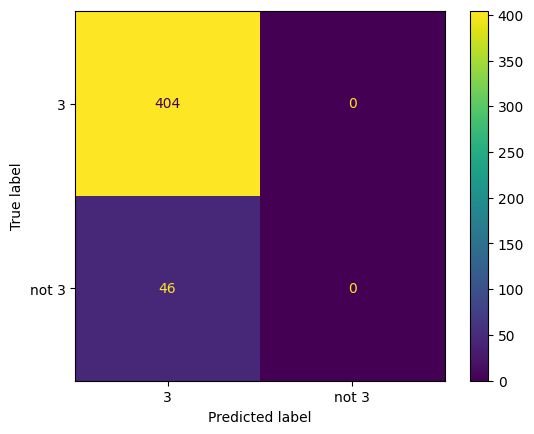

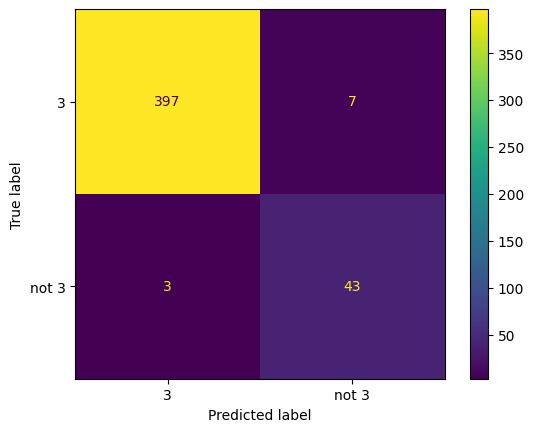

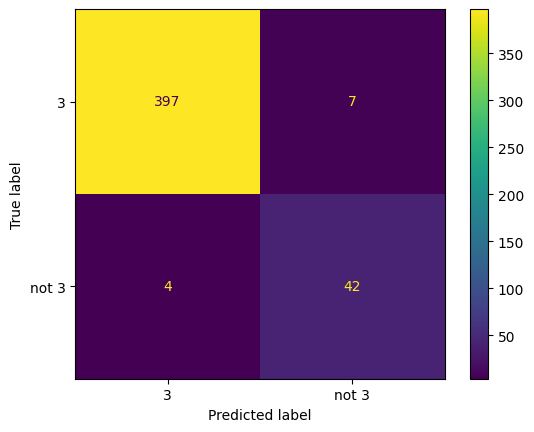

In [ ]:
# confusion matrix 계산 및 표시
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 혼동행렬 만들기
cm1 = confusion_matrix(y_test, dc.predict(X_test))
cm2 = confusion_matrix(y_test, logreg.predict(X_test))
cm3 = confusion_matrix(y_test, dtc.predict(X_test))
print(cm1, '\n\n', cm2, '\n\n', cm3)

# 혼동행렬 시각화
ConfusionMatrixDisplay.from_estimator(dc, X_test, y_test, display_labels=['3', 'not 3'])
ConfusionMatrixDisplay.from_estimator(logreg, X_test, y_test, display_labels=['3', 'not 3'])
ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test, display_labels=['3', 'not 3'])
plt.show()

In [41]:
# 모델평가 2
from sklearn.metrics import recall_score, precision_score, f1_score

print('\n더미:\n', recall_score(y_test, dc.predict(X_test)),
      precision_score(y_test, dc.predict(X_test)),
      f1_score(y_test, dc.predict(X_test)) )

print('\n로지스틱회귀:\n', recall_score(y_test, logreg.predict(X_test)),
      precision_score(y_test, logreg.predict(X_test)),
      f1_score(y_test, logreg.predict(X_test)) )

print('\n의사결정나무:\n', recall_score(y_test, dtc.predict(X_test)),
      precision_score(y_test, dtc.predict(X_test)),
      f1_score(y_test, dtc.predict(X_test)) )


더미:
 0.0 0.0 0.0

로지스틱회귀:
 0.9347826086956522 0.86 0.8958333333333334

의사결정나무:
 0.9130434782608695 0.8571428571428571 0.8842105263157894


C:\Users\human\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import classification_report

# 점수를 한번에 계산하기
print('\n더미:\n', classification_report(y_test, dc.predict(X_test)))
print('\n로지스틱:\n', classification_report(y_test, logreg.predict(X_test)))
print('\n의사결정나무:\n', classification_report(y_test, dtc.predict(X_test)))

# 더미:
#                precision    recall  f1-score   support

#            0       0.90      1.00      0.95       404
#            1       0.00      0.00      0.00        46
# 뭐를 목표로 보느냐에 따라 성능이 달라진다.


더미:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       404
           1       0.00      0.00      0.00        46

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.81      0.90      0.85       450


로지스틱:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       404
           1       0.86      0.93      0.90        46

    accuracy                           0.98       450
   macro avg       0.93      0.96      0.94       450
weighted avg       0.98      0.98      0.98       450


의사결정나무:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99       404
           1       0.86      0.91      0.88        46

    accuracy                           0.98       450
   macro avg       0.92      0.95      0.94       450
weighted avg       0.98      0.98      0.98       

C:\Users\human\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\human\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\human\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

##### 임계값 변경

In [ ]:
# 임계값을 변경해서 예측 결과를 다르게 선택

# 강도로 설정 decision_function
train_decision_values = logreg.decision_function(X_train)
train_decision_values
# (-) > 대부분 negitive
train_decision_values[train_decision_values > 0].shape # 137 개
# > 0.67502129, 14.51524184, 19.48954729, 23.98872468, 15.34321727
# 똑같이 True도 판단해도 강도가 다르다
train_decision_values[train_decision_values > 10].shape # 102 개
print(train_decision_values[train_decision_values > 10].shape) # 1071 개
print(train_decision_values[train_decision_values > -10].shape) # 276 개

# 확률로 설정 predict_proba > 기본 임계치는 0.5
train_proba_values = logreg.predict_proba(X_train)
train_proba_values
tv = train_proba_values[:][:, 1] # 두 번째 열 데이터 뽑기( Positive에 대한 확률 ) > y == 3
np.round(train_proba_values[tv > 0.5][:, 1], 2)
print(train_proba_values[tv > 0.7].shape)
print(train_proba_values[tv > 0.3].shape)

(102,)
(276,)
(131, 2)
(139, 2)


# 불균형 데이터 - make_blobs로 해보기

### 데이터 준비

In [76]:
# 데이터 준비
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

print( X.shape )
print( np.unique(y, return_counts = True) )

(4500, 2)
(array([0, 1]), array([4000,  500]))


### 모델훈련 - svc

In [74]:
# 모델 훈련
from sklearn.svm import SVC

svc = SVC(gamma=0.5)
svc.fit(X_train, y_train)

SVC(gamma=0.5)

### 모델 평가 및 의사 결정 정보 확인

(1125,) (1126,) (1126,)
977


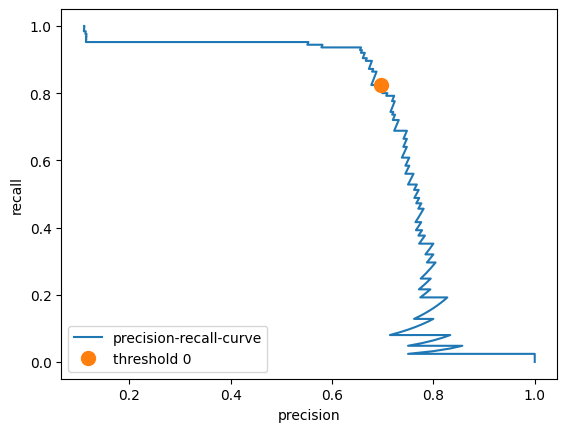

In [ ]:
# 모델 평가 및 의사 결정 정보 확인
from sklearn.metrics import precision_recall_curve

# 임계치의 변경에 따른 precision, recall의 변화률 도출

# decision_function로 precision_recall_curve 그리기
precisions, recalls, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
# 임계치를 주고, 그때의 precision 과 recall의 값이 나온다
# thresholds는 기본 0인데, 변화를 줘서 그때의 precision 과 recall의 값 확인
print( thresholds.shape, precisions.shape, recalls.shape )
thresholds
precisions  # min 0.11111111 > max 1
recalls     # max 1 > min 0.

# thresholds 값 출력
idx = np.argmin(np.abs(thresholds)) # 0에 가장 가까운 threshold 값의 위치 찾기 > 기본값
print( idx )

# 시각화 하기
plt.plot(precisions, recalls, label = 'precision-recall-curve')
plt.plot(precisions[idx], recalls[idx], 'o', markersize = 10, label = 'threshold 0')# 임계치 기본값 지점 출력
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend()
plt.show()

# precision_recall_curve > 임계치(thresholds)를 바꿀때 변화되는 precision과 recall